<a href="https://colab.research.google.com/github/digvijaysingh21/AI_ML_Libraries_foundational/blob/main/gradient_descent_for_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression Using Gradient Descent**

This notebook implements **Linear Regression** using **Gradient Descent**.

---

## **1. `compute_cost(x, y, w, b)`**
This function calculates the **Mean Squared Error (MSE)** cost function:

\[
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (f_{wb} - y_i)^2
\]

### **Inputs:**
- `x`: Feature values (input data)
- `y`: Target values (output data)
- `w`: Weight (slope of the line)
- `b`: Bias (intercept)

### **Outputs:**
- `total_cost`: The cost (error) of the linear regression model.

---

## **2. `compute_gradient(x, y, w, b)`**
This function computes the **gradients** (partial derivatives of the cost function w.r.t `w` and `b`).

### **Formulas:**
\[
\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} (f_{wb} - y_i) \cdot x_i
\]

\[
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (f_{wb} - y_i)
\]

### **Inputs:**
- `x, y, w, b`: Training data and parameters

### **Outputs:**
- `dj_dw`: Gradient of `w`
- `dj_db`: Gradient of `b`

These gradients help adjust `w` and `b` in the correct direction to minimize the cost function.

---

## **3. `gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function)`**
This function performs **Gradient Descent** to update `w` and `b` iteratively.

### **Algorithm:**
1. Compute the gradients using `compute_gradient(x, y, w, b)`.
2. Update `w` and `b` using the **learning rate** (`\alpha`):

\[
w := w - \alpha \cdot \frac{\partial J}{\partial w}
\]

\[
b := b - \alpha \cdot \frac{\partial J}{\partial b}
\]

3. Store the **cost history** for visualization.

### **Inputs:**
- `x, y`: Training data
- `w_in, b_in`: Initial values of `w` and `b`
- `alpha`: Learning rate
- `num_iters`: Number of iterations
- `cost_function`: Function to compute cost
- `gradient_function`: Function to compute gradients

### **Outputs:**
- `w, b`: Updated parameters
- `j_history`: List of cost values
- `p_history`: List of parameter updates

---



In [39]:

import numpy as np
import matplotlib.pyplot as plt


In [40]:
def compute_cost (x,y,w,b):
  """
  compute the cost function for linear regression

  Args:
    x(ndarray (m,)): Data, m examples
    y (ndarray (m,)): target values
    w,b (scaler): model parameters

    Returns
       total_cost (float): The cost of using w,b as the parameter for linear regression to fit ht edata points in x and y
  """
  #number of training examples
  m = x.shape[0]

  cost_sum = 0
  for i in range(m):
    f_wb = w* x[i] + b
    cost = (f_wb - y[i]) ** 2
    cost_sum = cost_sum + cost
  total_cost = (1/ (2 * m)) * cost_sum
  return total_cost

**Gradient descent
So far we have developed a linear model that predicts  𝑓𝑤,𝑏(𝑥(𝑖))
 :
$$
f_{w,b}(x^{(i)}) = w x^{(i)} + b
$$

In linear regression, you utilize input training data to fit the parameters  𝑤
 , 𝑏
  by minimizing a measure of the error between our predictions  𝑓𝑤,𝑏(𝑥(𝑖))
  and the actual data  𝑦(𝑖)
 . The measure is called the  𝑐𝑜𝑠𝑡
 ,  𝐽(𝑤,𝑏)
 . In training you measure the cost over all of our training samples  𝑥(𝑖),𝑦(𝑖)


$$
J(w, b) = \frac{1}{2m} \sum_{i=0}^{m-1} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right)^2
$$


In lecture, gradient descent was described as:

Repeat until convergence:  
$$
w := w - \alpha \frac{\partial J(w,b)}{\partial w}
$$  
$$
b := b - \alpha \frac{\partial J(w,b)}{\partial b}
$$

where, parameters w,b are  updated simultaneously.


The gradient is defined as:

$$
\frac{\partial J(w,b)}{\partial w} = \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) x^{(i)}
$$

$$
\frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})
$$


Here simultaniously means that you calculate the partial derivatives for all the parameters before updating any of the parameters.


Implement Gradient Descent


You will implement gradient descent algorithm for one feature. You will need three functions.

compute_gradient implementing equation (4) and (5) above


compute_cost implementing equation (2) above (code from previous lab)


gradient_descent, utilizing compute_gradient and compute_cost


Conventions:

The naming of python variables containing partial derivatives follows this pattern,∂𝐽(𝑤,𝑏)∂𝑏
 will be dj_db.


w.r.t is With Respect To, as in partial derivative of 𝐽(𝑤𝑏)
 With Respect To 𝑏
.

compute_gradient
compute_gradient implements (4) and (5) above and returns ∂𝐽(𝑤,𝑏)∂𝑤
,∂𝐽(𝑤,𝑏)∂𝑏
. The embedded comments describe the operations. **

In [41]:
def compute_gradient(x,y,w,b):
  """
   Computes the gradient for linear regression
   Args:
      x(ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scaler): mode parameters
      Returns
        dj_dw (scaler): The gradient of the cost w.r.t the parameters w
        dj_db (scaler): the graident of the cost w.r.t the parameter b
  """

  #number of training examples
  m = x.shape[0]
  dj_dw =0
  dj_db = 0

  for i in range(m):
    f_wb = w* x[i] + b
    dj_dw_i =(f_wb - y[i]) * x[i]
    dj_db_i = f_wb - y[i]

    dj_db += dj_db_i
    dj_dw += dj_dw_i
  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw, dj_db


In [42]:
import math
def gradient_descent(x,y,w_in, b_in, alpha, num_iters, cost_function, gradient_function):
  """
   performs gradient descent to fit w,b Updates w,b by taking
   num_iters gradient steps with learning rate alpha

   Args:
   x(ndarray (m,))      :   Data, m examples
   y (ndarray (m,))     :   targer values
   w_in, b_in (scaler)  :   initial values of the model parameters
   alpha(float)         :   Learning rate
   num_iters (int)      :   number of iterations to run gradient descent
   cost_function        :   function to call to produce cost
   gradient_function    :   function ro call to produce gradient

   returns
   w(scaler)            :   updated value of the parameter after running gradient descent
   b(scaler)            :   updated value of parameter after running gradient descent
   j_history (List      :   historty of the cost values
   p_history (list)     :   history of the parametres [w,b]
  """

  #an array to store cost j and w's at ecah iteration primarily for graphing later
  j_history = []
  p_history = []
  b = b_in
  w = w_in
  for i in range(num_iters):
    #calculate gradient and update the parameters using gradient_function
    dj_dw, dj_db = gradient_function(x,y,w,b)

    #update parameters
    b = b - alpha * dj_db
    w = w - alpha * dj_dw

    #save cost j at each iterations
    if i  < 100000:
      j_history.append(cost_function(x,y,w,b))
      p_history.append([w,b])

      #print cost every at intervals 10 times or as many iterations if i < 10
      if i% math.ceil(num_iters/10) == 0:
        print(f"Iteration {i:4}: cost {j_history[-1]:0.2e} "
      f"dj_dw: {dj_dw:0.3e}, dj_db: {dj_db:0.3e} "
      f"w: {w:0.3e}, b: {b:0.5e}")  # Fixed print statement

  return w,b, j_history, p_history

In [43]:

import numpy as np

# Sample dataset
# x_train = np.array([1, 2, 3, 4, 5])  # Feature values
# y_train = np.array([2, 4, 6, 8, 10])  # Target values (y = 2x)

x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

# Initial values for w and b
w_init = 0.0
b_init = 0.0

# Hyperparameters
# alpha = 0.01  # Learning rate
# num_iters = 1000  # Number of iterations

iterations  = 1000
tmp_alpha = 1.0e-2

# Run gradient descent
w_final, b_final, j_hist, p_hist = gradient_descent(
    x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient
)

# Print final values
print(f"Final w: {w_final:.4f}, Final b: {b_final:.4f}")


Iteration    0: cost 7.93e+04 dj_dw: -6.500e+02, dj_db: -4.000e+02 w: 6.500e+00, b: 4.00000e+00
Iteration  100: cost 8.68e+01 dj_dw: -2.057e+01, dj_db: -1.111e+01 w: 1.846e+02, b: 1.12410e+02
Iteration  200: cost 1.10e+01 dj_dw: -1.273e+00, dj_db: 7.015e-01 w: 1.907e+02, b: 1.14646e+02
Iteration  300: cost 9.48e+00 dj_dw: -6.373e-01, dj_db: 9.896e-01 w: 1.915e+02, b: 1.13710e+02
Iteration  400: cost 8.19e+00 dj_dw: -5.757e-01, dj_db: 9.303e-01 w: 1.921e+02, b: 1.12748e+02
Iteration  500: cost 7.08e+00 dj_dw: -5.347e-01, dj_db: 8.651e-01 w: 1.927e+02, b: 1.11851e+02
Iteration  600: cost 6.12e+00 dj_dw: -4.971e-01, dj_db: 8.043e-01 w: 1.932e+02, b: 1.11017e+02
Iteration  700: cost 5.29e+00 dj_dw: -4.621e-01, dj_db: 7.477e-01 w: 1.937e+02, b: 1.10242e+02
Iteration  800: cost 4.57e+00 dj_dw: -4.296e-01, dj_db: 6.950e-01 w: 1.941e+02, b: 1.09521e+02
Iteration  900: cost 3.95e+00 dj_dw: -3.993e-01, dj_db: 6.461e-01 w: 1.945e+02, b: 1.08851e+02
Final w: 194.9111, Final b: 108.2340


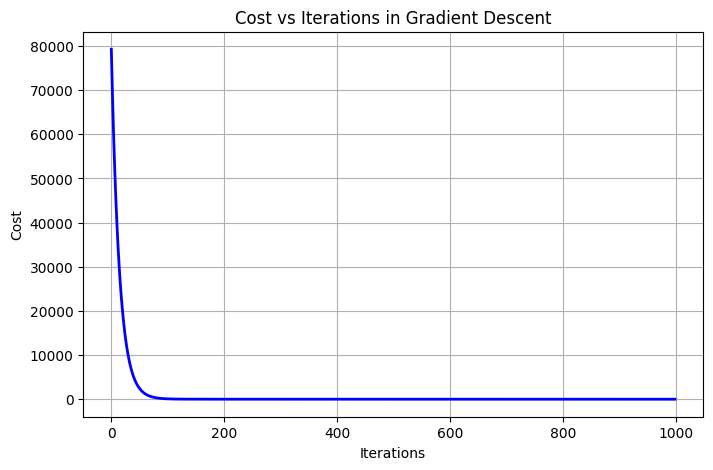

In [44]:
import matplotlib.pyplot as plt

# Plot Cost vs Iterations
plt.figure(figsize=(8, 5))
plt.plot(range(len(j_hist)), j_hist, color='b', linewidth=2)

# Labels and title
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations in Gradient Descent")
plt.grid(True)

# Show the plot
plt.show()


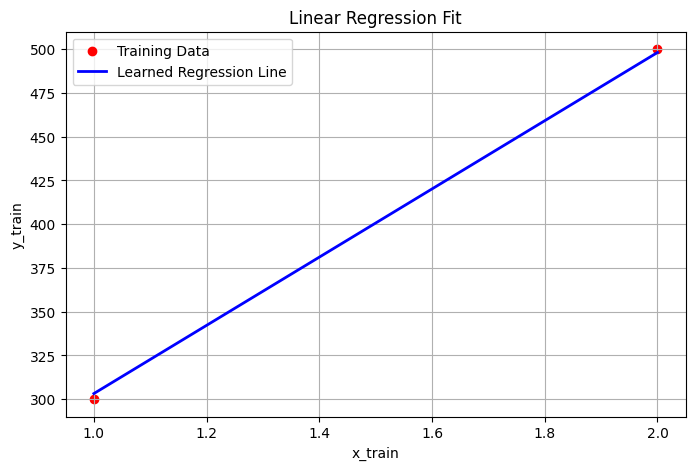

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Generate predicted values using final w and b
y_pred = w_final * x_train + b_final

# Scatter plot of the dataset
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train, color='red', label="Training Data")

# Plot the learned regression line
plt.plot(x_train, y_pred, color='blue', linewidth=2, label="Learned Regression Line")



# Labels and title
plt.xlabel("x_train")
plt.ylabel("y_train")
plt.title("Linear Regression Fit")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


improved above code in below code

In [48]:

#  Batch Gradient Descent
import numpy as np

def compute_cost(x, y, w, b):
    """
    Compute the cost function for linear regression using Mean Squared Error.

    Args:
        x (ndarray (m,)): Feature data (m examples)
        y (ndarray (m,)): Target values
        w (float): Weight parameter
        b (float): Bias parameter

    Returns:
        float: The computed cost
    """
    m = x.shape[0]
    predictions = w * x + b
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost


def compute_gradient(x, y, w, b):
    """
    Computes gradients for w and b.

    Args:
        x (ndarray (m,)): Feature data (m examples)
        y (ndarray (m,)): Target values
        w (float): Weight parameter
        b (float): Bias parameter

    Returns:
        tuple: (dj_dw, dj_db) gradients of cost function w.r.t w and b
    """
    m = x.shape[0]
    predictions = w * x + b
    error = predictions - y

    dj_dw = (1 / m) * np.dot(error, x)  # Vectorized computation
    dj_db = (1 / m) * np.sum(error)  # Sum of errors

    return dj_dw, dj_db


def gradient_descent(x, y, w_init, b_init, alpha, num_iters):
    """
    Performs gradient descent to optimize w and b.

    Args:
        x (ndarray (m,)): Feature data (m examples)
        y (ndarray (m,)): Target values
        w_init (float): Initial weight
        b_init (float): Initial bias
        alpha (float): Learning rate
        num_iters (int): Number of iterations

    Returns:
        tuple: (w, b, j_history) updated parameters and cost history
    """
    w, b = w_init, b_init
    j_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Store cost for plotting
        j_history.append(compute_cost(x, y, w, b))

        # Print progress every 10% iterations
        if i % (num_iters // 10) == 0:
            print(f"Iteration {i}: Cost = {j_history[-1]:.4f}, w = {w:.4f}, b = {b:.4f}")

    return w, b, j_history


# Sample Usage
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Reshape for consistency
X = X.flatten()
y = y.flatten()

# Initialize parameters
w_init, b_init = np.random.randn(), np.random.randn()
alpha = 0.1
num_iters = 1000

# Run gradient descent
w_opt, b_opt, cost_history = gradient_descent(X, y, w_init, b_init, alpha, num_iters)

print(f"\nOptimized parameters: w = {w_opt:.4f}, b = {b_opt:.4f}")


Iteration 0: Cost = 10.2689, w = 0.6131, b = 1.9890
Iteration 100: Cost = 0.4035, w = 2.7989, b = 4.1825
Iteration 200: Cost = 0.4033, w = 2.7753, b = 4.2092
Iteration 300: Cost = 0.4033, w = 2.7711, b = 4.2140
Iteration 400: Cost = 0.4033, w = 2.7703, b = 4.2149
Iteration 500: Cost = 0.4033, w = 2.7701, b = 4.2151
Iteration 600: Cost = 0.4033, w = 2.7701, b = 4.2151
Iteration 700: Cost = 0.4033, w = 2.7701, b = 4.2151
Iteration 800: Cost = 0.4033, w = 2.7701, b = 4.2151
Iteration 900: Cost = 0.4033, w = 2.7701, b = 4.2151

Optimized parameters: w = 2.7701, b = 4.2151


In [49]:
#  Stochastic Gradient Descent (SGD) lern in futures what is it?

In [50]:
import numpy as np

def compute_cost(x, y, w, b):
    """
    Compute the cost function for linear regression.

    Args:
        x (ndarray (m,)): Feature data
        y (ndarray (m,)): Target values
        w (float): Weight parameter
        b (float): Bias parameter

    Returns:
        float: Computed cost
    """
    m = x.shape[0]
    predictions = w * x + b
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost


def stochastic_gradient_descent(x, y, w_init, b_init, alpha, num_iters):
    """
    Performs Stochastic Gradient Descent to optimize w and b.

    Args:
        x (ndarray (m,)): Feature data
        y (ndarray (m,)): Target values
        w_init (float): Initial weight
        b_init (float): Initial bias
        alpha (float): Learning rate
        num_iters (int): Number of iterations

    Returns:
        tuple: (w, b, cost_history) updated parameters and cost history
    """
    w, b = w_init, b_init
    m = x.shape[0]
    cost_history = []

    for epoch in range(num_iters):
        for i in range(m):  # Update w and b for each sample
            xi, yi = x[i], y[i]
            prediction = w * xi + b
            error = prediction - yi

            # Compute gradients
            dj_dw = error * xi
            dj_db = error

            # Update parameters
            w -= alpha * dj_dw
            b -= alpha * dj_db

        # Compute cost after each epoch
        cost = compute_cost(x, y, w, b)
        cost_history.append(cost)

        # Print progress every 10% iterations
        if epoch % (num_iters // 10) == 0:
            print(f"Epoch {epoch}: Cost = {cost:.4f}, w = {w:.4f}, b = {b:.4f}")

    return w, b, cost_history


# Sample Usage
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Reshape for consistency
X = X.flatten()
y = y.flatten()

# Initialize parameters
w_init, b_init = np.random.randn(), np.random.randn()
alpha = 0.01  # Smaller learning rate for SGD
num_epochs = 50  # Fewer iterations since updates are more frequent

# Run Stochastic Gradient Descent
w_sgd, b_sgd, cost_history_sgd = stochastic_gradient_descent(X, y, w_init, b_init, alpha, num_epochs)

print(f"\nOptimized parameters using SGD: w = {w_sgd:.4f}, b = {b_sgd:.4f}")


Epoch 0: Cost = 0.6006, w = 2.5835, b = 3.7722
Epoch 5: Cost = 0.4069, w = 2.8723, b = 4.1780
Epoch 10: Cost = 0.4063, w = 2.8405, b = 4.2141
Epoch 15: Cost = 0.4062, w = 2.8270, b = 4.2294
Epoch 20: Cost = 0.4061, w = 2.8213, b = 4.2359
Epoch 25: Cost = 0.4061, w = 2.8188, b = 4.2386
Epoch 30: Cost = 0.4061, w = 2.8178, b = 4.2398
Epoch 35: Cost = 0.4061, w = 2.8174, b = 4.2403
Epoch 40: Cost = 0.4061, w = 2.8172, b = 4.2405
Epoch 45: Cost = 0.4061, w = 2.8171, b = 4.2406

Optimized parameters using SGD: w = 2.8171, b = 4.2407


## 🚀 Stochastic Gradient Descent (SGD) vs Batch Gradient Descent

| **Method**                     | **Update Frequency**                 | **Speed**              | **Suitability**                  |
|--------------------------------|-------------------------------------|------------------------|---------------------------------|
| **Batch Gradient Descent (BGD)** | Uses the entire dataset in each step | Slow for large data    | Works well for small datasets  |
| **Stochastic Gradient Descent (SGD)** | Updates parameters after each data point | Fast & efficient       | Works well for large datasets  |
